In [1]:
import pandas as pd
import numpy as np

In [2]:
import os 
import tarfile
from six.moves import urllib

#### 获取数据

In [3]:
download_root="https://raw.githubusercontent.com/ageron/handson-ml/master/"
house_path="datasets/housing"
housing_url=download_root+house_path+"/housing.tgz"

In [4]:
def fecthing_housing_data(housing_url=housing_url,house_path=house_path):
    if not os.path.exists(house_path):
        os.makedirs(house_path)
    tgz_path=os.path.join(house_path,'housing.tgz')
    urllib.request.urlretrieve(housing_url,tgz_path)
    housing_tgz=tarfile.open(tgz_path)
    housing_tgz.extractall(path=house_path)
    housing_tgz.close()

In [5]:
def load_housing_data(house_path=house_path):
    csv_path=os.path.join(house_path,"housing.csv")
    return pd.read_csv(csv_path)

#### 数据的初步分析，数据探索

In [6]:
# fecthing_housing_data()  # 下载数据，解压出csv文件
housing=load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
housing.info()
# total_bedrooms 存在缺失值，
# 前9列为float格式，经度，维度，房龄中位数，总的房间数，卧室数目，人口，家庭数，收入中位数，房屋价格的中位数，
# 最后一列为离海距离为object类型

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
# 需要查看ocean_proximity都包含哪些,
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [9]:
# 对数值类型的特征进行初步的统计
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EBA6F52978>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001EBA7442EB8>]], dtype=object)

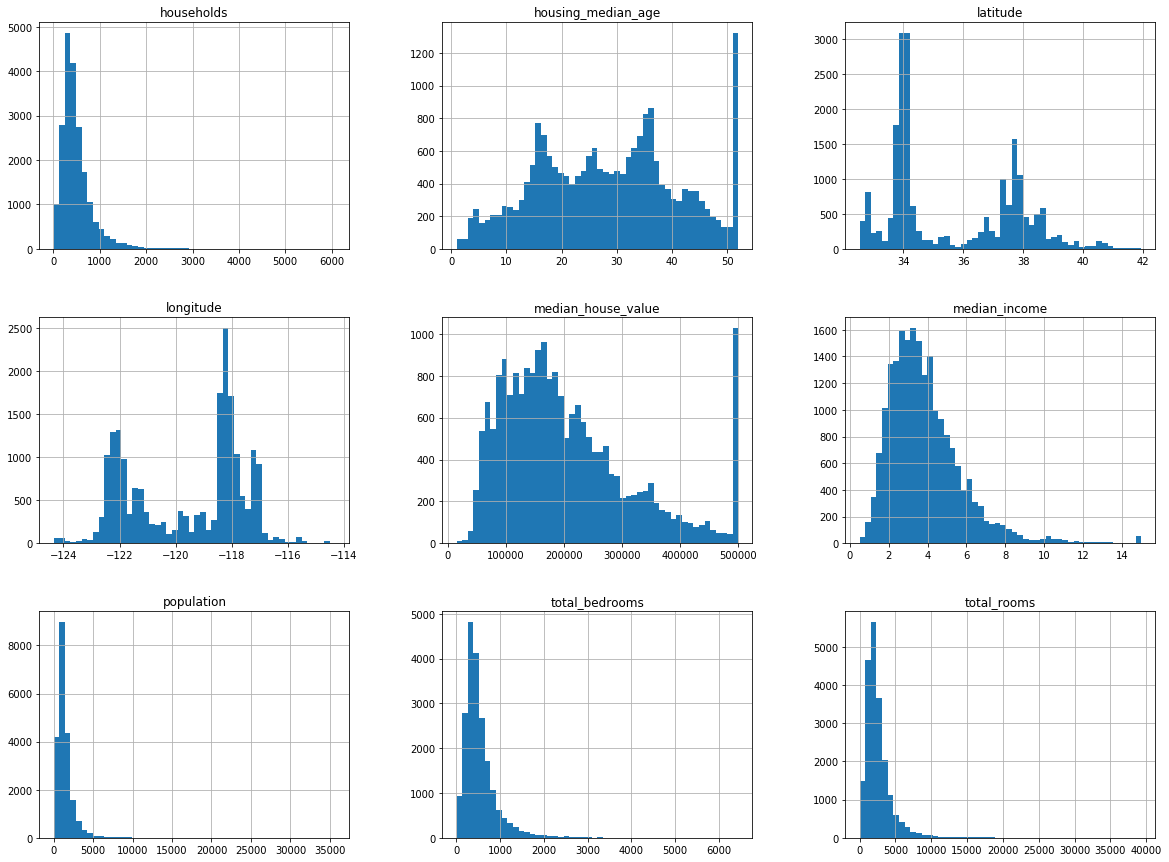

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
# 查看每个数值特征的分布，
housing.hist(bins=50,figsize=(20,15))
# plt.show()

#### 地理分布

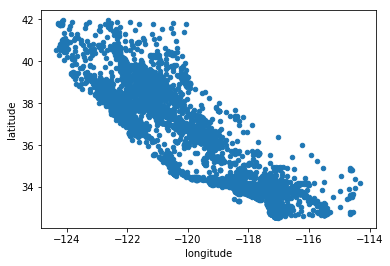

In [11]:
housing.plot(kind="scatter", x="longitude", y="latitude")

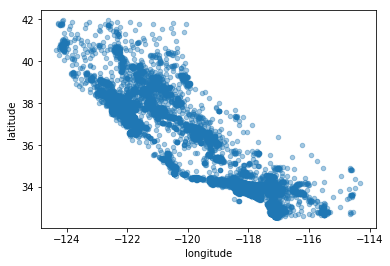

In [12]:
housing.plot(kind="scatter", x="longitude", y="latitude",alpha=0.4)
# 标量，可选，默认值无，alpha混合值，介于0（透明）和1（不透明）之间
# 显示高密度区域的散点图，颜色越深，表示人口越密集，虽然我对加州的地理位置不是特别清楚

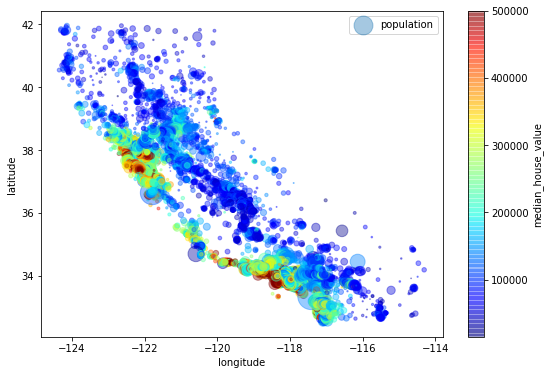

In [13]:
housing.plot(kind='scatter',x='longitude',y='latitude',alpha=0.4,
            s=housing['population']/50,label='population',
            c='median_house_value',cmap=plt.get_cmap("jet"),colorbar=True,sharex=False,
            figsize=(9,6))
# import matplotlib
# plt.figure(figsize=(15,9)) 
# sc=plt.scatter(housing['longitude'],housing['latitude'],alpha=0.4,
#             s=housing['population']/100,label='population',
#             c=housing['median_house_value'],cmap=plt.get_cmap("jet"))
# plt.legend()
# matplotlib.rcParams["font.sans-serif"]=["SimHei"]
# matplotlib.rcParams['axes.unicode_minus'] = False
# matplotlib.rcParams['font.size'] =15
# plt.xlabel('经度')
# plt.ylabel('纬度')
# color_bar=plt.colorbar(sc)
# color_bar.set_label('meidan_house_value')
# plt.show()
#以上为使用plt的完整代码，将坐标轴的内容以及添加colorbar，设置中文坐标轴标题

In [14]:
#  房价与位置和人口密度联系密切，但是如何用数学的角度来描述几个变量之间的关联呢，可以使用标准相关系数standard correlation coefficient 
# 常用的相关系数为皮尔逊相关系数
corr_matrix = housing.corr()
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


#### 数据特征的相关性

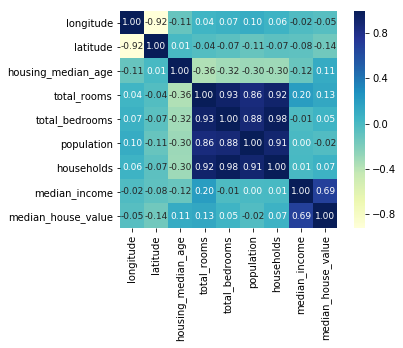

In [15]:
import seaborn as sns
plt.Figure(figsize=(25,20))
hm=sns.heatmap(corr_matrix,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size':9}, cmap="YlGnBu")
plt.show()

In [16]:
corr_matrix['median_house_value'].sort_values(ascending=False)
"""
相关系数的范围是 -1 到 1。当接近 1 时，意味强正相关；
例如，当收入中位数增加时，房价中位数也会增加。
当相关系数接近 -1 时，意味强负相关；
纬度和房价中位数有轻微的负相关性（即，越往北，房价越可能降低）。
最后，相关系数接近 0，意味没有线性相关性。
"""

'\n相关系数的范围是 -1 到 1。当接近 1 时，意味强正相关；\n例如，当收入中位数增加时，房价中位数也会增加。\n当相关系数接近 -1 时，意味强负相关；\n纬度和房价中位数有轻微的负相关性（即，越往北，房价越可能降低）。\n最后，相关系数接近 0，意味没有线性相关性。\n'

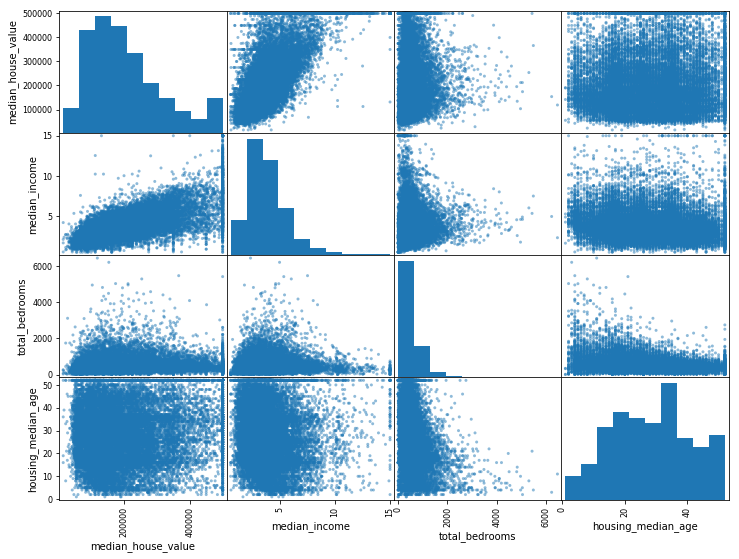

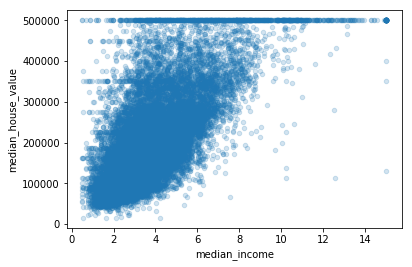

In [17]:
# 使用pandas中的scatter_matrix 可以从另外一种角度分析多个变量之间的相关性
from pandas.plotting import  scatter_matrix
attributes=['median_house_value',"median_income","total_bedrooms","housing_median_age"]
scatter_matrix(housing[attributes],figsize=(12,9))
# sns.pairplot(housing[['median_house_value',"median_income",]],height=5)
# 使用seaborn中的pariplot可以实现同样的结果
housing.plot(kind="scatter",x='median_income',y='median_house_value',alpha=0.2)

#### 创建新的特征

- 重点关注收入的中位数与房屋价值的中位数之间的关系，从上图以及相关系数都可以得到两者之间存在很明显的正相关
- 可以清洗的看到向上的趋势，并且数据点不是非常分散，
- 我们之前统计得到的最高房价位于5000000美元的水平线
- 从频率分布直方图hist可以看到housing_median_age ,meidan_house_value 具有长尾分布，可以尝试对其进行log或者开根号等转化
- 当然，不同项目的处理方法各不相同，但大体思路是相似的。

In [18]:
housing['rooms_per_household']=housing['total_rooms']/housing['households']
housing['bedrooms_per_room']= housing['total_bedrooms']/housing['total_rooms']
housing['population_per_household']=housing['population']/housing['households']

In [19]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)
# """
# 新的特征房间中，卧室占比与房屋价值中位数有着更明显的负相关性，比例越低，房价越高；
# 每家的房间数也比街区的总房间数的更有信息，很明显，房屋越大，房价就越高
# """

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

#### 数据清洗， 创建处理流水线
- 缺失值处理
- 处理object文本数据类型
- 特征放缩
- 构建模型pepeline
- 以上几个步骤我们在之前的博客中基本上都已经用过，这里作为读书笔记不会再过多的详细解释

In [20]:
# total_bedrooms特征缺失值处理
"""
- 去掉含有缺失值的样本，dropna()
- 去掉含有缺失值的特征 dropna(axis=1)
- 进行填充（中位数，平均值，0，插值填充） fillna(housing['total_bedrooms'].median()) 较为方便的使用pandas中的方法
"""
from sklearn.preprocessing import Imputer
imputer=Imputer(strategy='mean')
housing_num=housing.drop('ocean_proximity',axis=1)
imputer.fit(housing_num)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)

In [21]:
housing_num_trans=pd.DataFrame(imputer.transform(housing_num),columns=housing_num.columns)
housing_num_trans.info()
# 缺失值补齐，总觉得如果是缺失值处理的话，可以直接用pandas中的fillna会节省一点时间，在原始的数据上直接处理掉，后面也就不用再去担心这个

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 12 columns):
longitude                   20640 non-null float64
latitude                    20640 non-null float64
housing_median_age          20640 non-null float64
total_rooms                 20640 non-null float64
total_bedrooms              20640 non-null float64
population                  20640 non-null float64
households                  20640 non-null float64
median_income               20640 non-null float64
median_house_value          20640 non-null float64
rooms_per_household         20640 non-null float64
bedrooms_per_room           20640 non-null float64
population_per_household    20640 non-null float64
dtypes: float64(12)
memory usage: 1.9 MB


In [22]:
# 处理文本object类型数据
from sklearn.preprocessing import  LabelEncoder
encoder= LabelEncoder()
house_cat=housing['ocean_proximity']
house_cat_encode=encoder.fit_transform(house_cat)
house_cat_encode

array([3, 3, 3, ..., 1, 1, 1], dtype=int64)

In [23]:
encoder.classes_

array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'], dtype=object)

- 在之前博客中也提到类似的操作，改操作可能会将两个临近的值
- 比两个疏远的值更为相似，因此一般情况下，对与类标才会使用LabelEncoder,对于特征不会使用该方式对特征转换
- 更为常用的操作是独热编码，给每个分类创建一个二元属性，比如当分类是INLAND，有则是1，没有则是0
- skleanrn中提供了编码器OneHotEncoder，类似与pandas中pd.get_dummies()

In [24]:
from sklearn.preprocessing import OneHotEncoder
# OneHotEncoder只能对数值型数据进行处理,只接受2D数组
encoder=OneHotEncoder()
housing_cat_1hot=encoder.fit_transform(house_cat_encode.reshape((-1,1)))
housing_cat_1hot

<20640x5 sparse matrix of type '<class 'numpy.float64'>'
	with 20640 stored elements in Compressed Sparse Row format>

In [25]:
housing_cat_1hot.toarray()

array([[ 0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  1.,  0.],
       ..., 
       [ 0.,  1.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.]])

In [26]:
# 使用LabelBinarizer 可以实现同样的效果
from sklearn.preprocessing import  LabelBinarizer
encoder=LabelBinarizer()
housing_cat_1hot=encoder.fit_transform(house_cat)
housing_cat_1hot

array([[0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       ..., 
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0]])

In [27]:
# 直接在原始的数据上使用pandas.get_dummies()是最简单的方法
pd.get_dummies(housing[['ocean_proximity']]).head()

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0


In [28]:
# 特征放缩 我们常用到的MinMaxScaler和StandandScaler两种
# 一般会对不同范围内的特征进行放缩，有助于优化算法收敛的速度（尤其是针对梯度提升的优化算法）
# 归一化： 减去最小值，然后除以最大最小值的差
# 标准化： 减去平均值，然后除以方差，得到均值为0，方差为1的标准正态分布，受异常值影响比较小，决策树和随机森林不需要特征放缩
# 特征放缩一般针对训练数据集进行transform_fit，对测试集数据进行transform

In [29]:
# 从划分数据集→pipeline
from sklearn.model_selection import  train_test_split
housing=load_housing_data()
# train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)  #  随机采样
from sklearn.model_selection import StratifiedShuffleSplit  #  分层采样

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)

for train_index, test_index in split.split(housing, housing["income_cat"]): # 按照收入中位数进行分层采样
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]
housing = strat_train_set.copy()  # 创建一个副本，以免损伤训练集，

In [30]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 11 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16354 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
median_house_value    16512 non-null float64
ocean_proximity       16512 non-null object
income_cat            16512 non-null float64
dtypes: float64(10), object(1)
memory usage: 1.5+ MB


In [31]:
#转化流水线
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_pipeline=Pipeline([('imputer',Imputer(strategy='median')),('std_scaler',StandardScaler())])
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()
housing_num=housing.drop('ocean_proximity',axis=1)
housing_num_tr = num_pipeline.fit_transform(housing_num)
housing_cat=housing['ocean_proximity']
housing_cat_tr= LabelBinarizer().fit_transform(housing_cat)
housing_train=np.c_[housing_num_tr,housing_cat_tr]
housing_train.shape
#  数字特征与categoriy 特征不能同时进行转化，需要进行FeatureUnion
# 你给它一列转换器（可以是所有的转换器），当调用它的transform()方法，每个转换器的transform()会被并行执行，
# 等待输出，然后将输出合并起来，并返回结果
# 当然也可以通过分批转化，然后通过np将转化好的数据集合并，本质上没有什么区别，只不过对于测试集仍然需要transform，然后再合并成转化好的测试集

(16512, 14)

In [32]:
import os
import sys
sys.path.append(os.getcwd())
from future_encoders import ColumnTransformer
from future_encoders import OneHotEncoder

In [33]:
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ..., 
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

In [34]:
np.allclose(housing_prepared, housing_train)

True

#### 选择回归算法进行模型训练

In [35]:
# 首先使用线性回归进行测试
from sklearn.linear_model import  LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(housing_prepared,housing_labels)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [36]:
housing_test = strat_test_set.drop("median_house_value", axis=1)

test_set_label=strat_test_set["median_house_value"].copy()
y_train_pred=lin_reg.predict(housing_prepared)
test_set_tr=full_pipeline.transform(housing_test)
y_test_pred= lin_reg.predict(test_set_tr)
housing_predictions = lin_reg.predict(housing_prepared)
from sklearn.metrics import mean_squared_error
lin_mse=mean_squared_error(housing_labels,housing_predictions)
print("lr_rmse:%d" % np.sqrt(lin_mse))
print("MSE train: %.3f,test:%.3f" %(mean_squared_error(housing_labels,y_train_pred),mean_squared_error(test_set_label,y_test_pred)))

lr_rmse:68867
MSE train: 4742665159.462,test:4520904021.602


In [37]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)
housing_predictions = tree_reg.predict(housing_prepared)
mean_squared_error(housing_labels, housing_predictions)
# 训练数据集过拟合，对于测试集然而还不如普通的线性回归好使，有的时候不能只看训练，还得拿测试搞一搞啊

0.0

In [38]:
y_test_pred=tree_reg.predict(test_set_tr)
print("MSE train: %.3f,test:%.3f" %(mean_squared_error(housing_labels,housing_predictions),mean_squared_error(test_set_label,y_test_pred)))

MSE train: 0.000,test:4717728430.274


#### 调整模型参数

In [39]:
# 随机森林相比之前的线性回归以及树回归，评估回归拟合效果的主要指标是均方误差MSE（mean squared error,MSE) 
from sklearn.model_selection import cross_val_score
scores= cross_val_score(tree_reg,housing_prepared,housing_labels,scoring="neg_mean_squared_error",cv=10)
tree_rmse_socres=np.sqrt(-scores)
def display_scores(scores):
    print("Scores",scores)
    print("Mean",scores.mean())
    print("Standard deviation",scores.std())
display_scores(tree_rmse_socres)

Scores [ 66507.83267994  65236.20364046  72027.87240333  68882.86005331
  69281.22335666  75482.97073455  67061.86598093  69383.84679998
  71049.73499205  69257.96445363]
Mean 69417.2375095
Standard deviation 2794.5944216


In [40]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores [ 67621.36459192  67050.2893707   68159.77945126  74185.17069359
  68112.25073467  71610.00721757  65235.24278175  68160.85292722
  72191.44396288  68163.77349381]
Mean 69049.0175225
Standard deviation 2581.32400402


In [41]:
#  既然决策树的过拟合情况比较严重，那么可以考虑采用随机森林回归进行拟合模型
from sklearn.ensemble import RandomForestRegressor
forest_reg=RandomForestRegressor(random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [42]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse=mean_squared_error(housing_labels,housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

21809.830351465986

In [43]:
forest_scores= cross_val_score(forest_reg,housing_prepared,housing_labels,scoring="neg_mean_squared_error",cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores [ 50211.79394376  48818.38491117  52670.00244606  52733.07929061
  51662.91589372  56119.66545305  50928.19257337  53388.36396385
  53718.50806363  52144.48908659]
Mean 52239.5395626
Standard deviation 1920.12014815


In [44]:
forest_reg.feature_importances_

array([  1.08729692e-01,   1.05794105e-01,   5.13494292e-02,
         2.29355415e-02,   2.28263250e-02,   3.22424835e-02,
         2.17037186e-02,   4.82643494e-01,   6.07242721e-04,
         4.02851174e-03,   1.41568646e-01,   1.53728570e-05,
         6.77628100e-04,   4.87780968e-03])

#### 尝试利用sklearn中的模块保存模型

In [45]:
from sklearn.externals import  joblib
joblib.dump(forest_reg,"forest_model.pkl")
# 调用模块
forest_model_loaded=joblib.load("forest_model.pkl")

#### grid_search 参数优化


In [46]:
from sklearn.svm import  SVR
svm_reg=SVR(kernel='linear')
svm_reg.fit(housing_prepared,housing_labels)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [47]:
housing_predictions=svm_reg.predict(housing_prepared)
svm_mse=mean_squared_error(housing_labels,housing_predictions)
svm_rmse=np.sqrt(svm_mse)
svm_rmse

107334.94039494894

In [48]:
y_test_pred=svm_reg.predict(test_set_tr)
print("MSE train: %.3f,test:%.3f" %(np.sqrt(mean_squared_error(housing_labels,housing_predictions)),np.sqrt(mean_squared_error(test_set_label,y_test_pred))))

MSE train: 107334.940,test:105650.272


In [49]:
from sklearn.model_selection import  GridSearchCV
para_grid=[
    {'n_estimators':[3,10,30],'max_features':[2,4,6,8]},
    {'bootstrap':[False],'n_estimators':[3,10],'max_features':[2,3,4]}
]
forest_reg=RandomForestRegressor(random_state=42)
grid_search=GridSearchCV(forest_reg,para_grid,cv=5,scoring='neg_mean_squared_error',return_train_score =True,)
grid_search.fit(housing_prepared,housing_labels)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [50]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [51]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=8, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=30, n_jobs=1, oob_score=False, random_state=42,
           verbose=0, warm_start=False)

In [52]:
cvresults=grid_search.cv_results_
# grid_search 的scriterion='mse'
# http://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
for mean_score, params in zip(cvresults['mean_test_score'],cvresults['params']):
    print(np.sqrt(-mean_score),params)

65341.237623 {'max_features': 2, 'n_estimators': 3}
56858.322929 {'max_features': 2, 'n_estimators': 10}
53731.3936265 {'max_features': 2, 'n_estimators': 30}
62515.3680178 {'max_features': 4, 'n_estimators': 3}
54282.1388306 {'max_features': 4, 'n_estimators': 10}
52185.7777851 {'max_features': 4, 'n_estimators': 30}
59857.5845113 {'max_features': 6, 'n_estimators': 3}
53489.7755617 {'max_features': 6, 'n_estimators': 10}
51662.3738727 {'max_features': 6, 'n_estimators': 30}
59187.034414 {'max_features': 8, 'n_estimators': 3}
53005.1241243 {'max_features': 8, 'n_estimators': 10}
51111.761753 {'max_features': 8, 'n_estimators': 30}
62702.3541677 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
55243.5589865 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60840.2293635 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
53767.3623666 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}
60812.8352268 {'bootstrap': False, 'max_features': 4, 'n_estimator

In [53]:
pd.DataFrame(cvresults)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.062919,0.010115,0.002195,0.001829,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-4.074268e+09,-4.243909e+09,...,-4.269477e+09,1.378744e+08,18,-1.144644e+09,-1.126977e+09,-1.087117e+09,-1.156102e+09,-1.206489e+09,-1.144266e+09,3.892797e+07
1,0.208212,0.019124,0.011744,0.008533,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-2.984773e+09,-3.208944e+09,...,-3.232869e+09,1.553208e+08,11,-5.860488e+08,-5.770348e+08,-5.718960e+08,-5.997449e+08,-6.086232e+08,-5.886695e+08,1.374333e+07
2,0.648651,0.033645,0.025260,0.007330,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-2.655288e+09,-2.924775e+09,...,-2.887063e+09,1.495855e+08,7,-4.395876e+08,-4.430821e+08,-4.366239e+08,-4.470758e+08,-4.451293e+08,-4.422997e+08,3.768284e+06
3,0.104462,0.010564,0.003124,0.006248,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-3.595589e+09,-3.748169e+09,...,-3.908171e+09,2.141522e+08,16,-1.005454e+09,-9.682629e+08,-1.025229e+09,-1.083183e+09,-1.045543e+09,-1.025534e+09,3.848913e+07
4,0.328658,0.012267,0.009385,0.007663,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-2.685694e+09,-2.881602e+09,...,-2.946551e+09,1.781711e+08,9,-5.432710e+08,-5.407132e+08,-5.274334e+08,-5.419561e+08,-5.475451e+08,-5.401838e+08,6.778106e+06
5,0.969467,0.038585,0.032665,0.002830,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-2.477926e+09,-2.724717e+09,...,-2.723355e+09,1.621913e+08,3,-4.230338e+08,-4.153890e+08,-4.111375e+08,-4.118985e+08,-4.150669e+08,-4.153052e+08,4.213557e+06
6,0.128173,0.011070,0.003922,0.006051,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-3.358763e+09,-3.467711e+09,...,-3.582930e+09,2.182875e+08,13,-9.881325e+08,-9.111859e+08,-9.068783e+08,-9.468925e+08,-1.009757e+09,-9.525692e+08,4.090876e+07
7,0.435437,0.030754,0.009374,0.007654,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-2.588799e+09,-2.786989e+09,...,-2.861156e+09,2.097127e+08,5,-5.287537e+08,-5.075923e+08,-5.027894e+08,-5.112341e+08,-5.427850e+08,-5.186309e+08,1.492251e+07
8,1.377437,0.072542,0.033572,0.004656,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-2.432049e+09,-2.686925e+09,...,-2.669001e+09,1.656602e+08,2,-4.189669e+08,-4.000166e+08,-3.969446e+08,-3.983876e+08,-4.082824e+08,-4.045196e+08,8.223667e+06
9,0.169431,0.012865,0.003118,0.006237,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-3.132466e+09,-3.585189e+09,...,-3.503105e+09,2.021376e+08,12,-9.263485e+08,-9.025428e+08,-8.816123e+08,-9.249972e+08,-9.146393e+08,-9.100280e+08,1.658422e+07


In [54]:
from sklearn.model_selection import  RandomizedSearchCV
from scipy.stats import randint
para_distributes={
    "n_estimators":randint(low=1,high=200),
    "max_features":randint(low=1,high=8)
}
forest_reg=RandomForestRegressor(random_state=42)
rnd_search=RandomizedSearchCV(forest_reg,para_distributes,n_iter=10,cv=5,scoring='neg_mean_squared_error',random_state=42)
rnd_search.fit(housing_prepared,housing_labels)

RandomizedSearchCV(cv=5, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001EBBAB56668>, 'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001EBBAB56048>},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring='neg_mean_squared_error',
          verbose=0)

In [55]:
rnd_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=7, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=180, n_jobs=1, oob_score=False, random_state=42,
           verbose=0, warm_start=False)

In [56]:
rnd_search.best_params_

{'max_features': 7, 'n_estimators': 180}

In [57]:
rnd_cvresults=rnd_search.cv_results_
for score ,params in zip(rnd_cvresults['mean_test_score'],rnd_cvresults['params']):
    print(np.sqrt(-score),params)

50386.0381067 {'max_features': 7, 'n_estimators': 180}
52789.5684258 {'max_features': 5, 'n_estimators': 15}
51987.2804601 {'max_features': 3, 'n_estimators': 72}
52295.1643986 {'max_features': 5, 'n_estimators': 21}
50451.8750374 {'max_features': 7, 'n_estimators': 122}
52024.4012903 {'max_features': 3, 'n_estimators': 75}
51893.0650234 {'max_features': 3, 'n_estimators': 88}
50985.5399157 {'max_features': 5, 'n_estimators': 100}
51825.405747 {'max_features': 3, 'n_estimators': 150}
67262.2425308 {'max_features': 5, 'n_estimators': 2}


In [58]:
rnd_search.best_estimator_.feature_importances_

array([  1.00850348e-01,   9.32301650e-02,   5.19800293e-02,
         3.06140118e-02,   3.13097228e-02,   4.06397285e-02,
         2.90934512e-02,   3.50673965e-01,   1.18144192e-01,
         1.13256944e-02,   1.32219731e-01,   7.32054841e-05,
         3.24735487e-03,   6.59840041e-03])

In [59]:
for i,j in sorted(zip(rnd_search.best_estimator_.feature_importances_,num_attribs+list(encoder.classes_)),reverse=True):
    print(i,j)

0.350673965062 median_income
0.132219730759 INLAND
0.118144192451 income_cat
0.100850347904 longitude
0.09323016502 latitude
0.0519800293463 housing_median_age
0.040639728548 population
0.0313097228073 total_bedrooms
0.0306140117788 total_rooms
0.02909345119 households
0.0113256943716 <1H OCEAN
0.0065984004116 NEAR OCEAN
0.0032473548662 NEAR BAY
7.32054840901e-05 ISLAND


In [60]:
final_model= rnd_search.best_estimator_
y_test_pred=final_model.predict(test_set_tr)
print(np.sqrt(mean_squared_error(test_set_label,y_test_pred)))

47710.1359228


In [61]:
# 对test数据集的RMSE计算95%置信区间
from scipy import stats
confidence=0.95
squared_errors=(test_set_label-y_test_pred)**2
mean_value=squared_errors.mean()
# stats.sem  Calculates the standard error of the mean (or standard error of measurement) of the values in the input array.
# https://blog.csdn.net/luoganttcc/article/details/78278933
np.sqrt(stats.t.interval(confidence,len(squared_errors)-1,loc=mean_value,scale=stats.sem(squared_errors)))

array([ 45765.86843292,  49578.21523736])

In [62]:
# 另外一种方法可以实现
tscore=stats.t.ppf((1+confidence)/2,df=mean_value-1)
tmargin=tscore*squared_errors.std(ddof=1)/np.sqrt(len(squared_errors))
np.sqrt(mean_value-tmargin),np.sqrt(mean_value+tmargin)


(45766.450751316006, 49577.677690356053)

In [63]:
# 同样可以使用 z-scores 实现
zscore = stats.norm.ppf((1 + confidence) / 2)
zmargin = zscore * squared_errors.std(ddof=1) / np.sqrt(len(squared_errors))
np.sqrt(mean_value - zmargin), np.sqrt(mean_value + zmargin)

(45766.450752371478, 49577.677689381722)